### 设置环境
pytorch相比于tensorflow更容易入手，因此我们采用pytorch来完成下面的实验。

推荐使用vscode进行实验，插件商店中中有jupyter notebook和tensorboard的插件

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 设置显卡环境，选择使用的显卡
##torch.cuda.set_device(5)

# 导入tensorboard，用来可视化训练情况
from tensorboardX import SummaryWriter
writer = SummaryWriter('./log/')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### 导入数据集
获取MNIST数据集的方法有两种：

1. 数字识别数据集MNIST在torchvision中有集成，可以参考 https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.MNIST 将其导入项目中

2. 可从官网中 http://yann.lecun.com/exdb/mnist/ 下载到数据集，但需要注意数据集需要自己进行处理。以下是网站上给的数据存储方式：
```
TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
[offset] [type]          [value]          [description]
0000     32 bit integer  0x00000803(2051) magic number
0004     32 bit integer  60000            number of images
0008     32 bit integer  28               number of rows
0012     32 bit integer  28               number of columns
0016     unsigned byte   ??               pixel
0017     unsigned byte   ??               pixel
........
xxxx     unsigned byte   ??               pixel
```
最开始的四位被称为magic number，用于确认文件读取是否正确。其余内容参见description，一个pixel正好8个字节，范围为[0,255]。

导入的数据需要变成Tensor以方便后面的操作，具体变换的格式可以参考 https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor


In [2]:
## 使用第一种方法读入data并将其转化成tensor，命名为MNIST_train和MNIST_test

###############
#此处加入你的代码#
###############
# trans = transforms.ToTensor()
# MNIST_train = torchvision.datasets.MNIST(root = "./Data", train = True, transform = trans, download = False)
# MNIST_test = torchvision.datasets.MNIST(root = "./Data", train = False, transform = trans, download = False)

# 查看训练集和测试集的长度
print(len(MNIST_train), len(MNIST_test))
# 如果读入正确应该输出(60000, 10000)

60000 10000
/home/taochenning/.conda/envs/SC/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
def showImg(MNIST_train, number):
    """显示具体的图像"""
    (data, label) = MNIST_train[number]
    img = np.squeeze(data)
    plt.imshow(img, cmap='gray')
    plt.title(label, color='blue')
    plt.show()

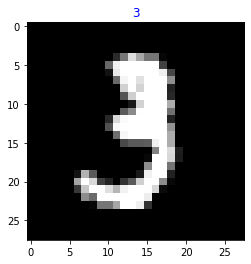

In [4]:
# 修改数字可以看到不同的图像
showImg(MNIST_train, 10)


神经网络的训练一般会将网络分成若干个batch进行训练，我们使用pytorch的dataloader来对数据进行处理，详细文档参见 https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
注意使用后返回的是一个迭代器

In [5]:
# 你可以修改不同的batch_size大小进行尝试
batch_size = 100
# 使用dataloader将数据加载进来
#####################
# 此处加入代码        #
#####################
# train_loader = DataLoader(dataset = MNIST_train, batch_size = 100, shuffle = True)
# test_loader = DataLoader(dataset = MNIST_test, batch_size= 100, shuffle = True)

### 网络结构
使用pytorch定义网络结构十分方便，可以参考文档 https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=torch%20nn%20module#torch.nn.Module 进行书写。

请你根据LeNet5论文中给出的神经网络结构完成一个Model class（详细内容请参考论文：http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf）

![jupyter](./LeNet5.png)

具体的连接层如何写也请参考文档 https://pytorch.org/docs/stable/nn.html


In [42]:
class Model(torch.nn.Module):
    def __init__(self) :
        super(Model, self).__init__()
        ## 请在此加入你的网络定义
        # self.conv1 = nn.Sequential(nn.Conv2d(1, 6, 3, 1, 1),
        #                            nn.Sigmoid())
        # self.avgPool1 = nn.Sequential(nn.AvgPool2d(2, 2))
        # self.conv2 = nn.Sequential(nn.Conv2d(6, 16, 5),
        #                            nn.Sigmoid())
        # self.avgPool2 = nn.Sequential(nn.AvgPool2d(2, 2),
        #                               nn.Flatten())
        # self.linear1 = nn.Sequential(nn.Linear(16*5*5, 120),
        #                              nn.Sigmoid())
        # self.linear2 = nn.Sequential(nn.Linear(120, 84),
        #                              nn.Sigmoid())
        # self.linear3 = nn.Sequential(nn.Linear(84, 10),
        #                              nn.GELU()) 
    def forward(self, x) :
        ## 请在此加入前向传播函数
        # x = self.conv1(x)
        # x = self.avgPool1(x)
        # x = self.conv2(x)
        # x = self.avgPool2(x)
        # x = self.linear1(x)
        # x = self.linear2(x)
        # x = self.linear3(x)
        return x

In [2]:
# 请检查神经网络每一步获得的tensor大小正确，检查的示例代码如下：
net = torch.nn.Sequential(torch.nn.Conv2d(1, 64, 5, 5, 5),
                          torch.nn.ReLU())
# 随机生成一个输入向量
# 输入向量是(1, 1, 28, 28)的原因：一般一个batch的tensor的形状是(B, C, H, W)
# B为一个batch中图片的数量
# C为通道数量
# H为高
# W为宽
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

NameError: name 'torch' is not defined

### 损失函数与优化方法
下面的代码中你需要做三件事情：

1. 确定模型运行的位置（若在gpu中运行需要将模型移动到gpu上）

2. 定义损失函数 (https://pytorch.org/docs/stable/nn.html#loss-functions)

3. 选择优化器 (https://pytorch.org/docs/stable/optim.html?highlight=torch%20optim#module-torch.optim)

In [45]:
# model = Model().to(device)
# cost = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters())

### 训练
提示：

1. 利用backward()进行方向传播的梯度计算，optimizer.step()进行梯度下降

2. 注意数据存放的位置

若成功可以在tensorboard中看到训练loss和准确度的变化


In [46]:
epochs = 5
model.train()
with SummaryWriter() as writer:
    for epoch in range(epochs):
        sum_loss = 0.0
        train_correct = 0 # 用来统计判断正确的数量
        ## 加入你的代码
        # for i, data in enumerate(train_loader):
        #     inputs, lables = data
        #     inputs, lables = inputs.to(device), lables.to(device)
        #     optimizer.zero_grad()
        #     outputs = model(inputs)
        #     loss = cost(outputs, lables)
        #     loss.backward()
        #     optimizer.step()

        #     _, id = torch.max(outputs.data, 1)
        #     sum_loss += loss
        #     train_correct += torch.sum(id == lables.data)

        writer.add_scalar('loss', sum_loss / len(train_loader), epoch)
        writer.add_scalar('train_acc', 100 * train_correct / len(MNIST_train), epoch)

### 测试
步骤和训练类似，需要得到正确的个数

In [54]:
model.eval()
# 用来统计正确的数量
test_correct = 0

## 插入你的代码
# for i, data in enumerate(test_loader):
#     inputs, lables = data
#     inputs, lables = inputs.to(device), lables.to(device)
#     outputs = model(inputs)
#     _, id = torch.max(outputs.data, 1)
#     test_correct += torch.sum(id == lables.data)

print("correct: %.3f%%" % (100 * test_correct / len(MNIST_test)))

correct: 86.390%


### 思考问题：
1. 池化层有很多种，较常使用的是平均和最大，在这个数据集上使用有什么的区别，哪个效果好一些？
2. 修改网络结构以求得到更好的效果，可能的修改方向：

    a. 调整卷积窗口的大小、步长

    b. 调整卷积层的数量

    c. 调整全连接层的数量

    d. 调整激活函数
    
    e. 调整输出通道的多少
3. 在MNIST数据集上尝试改进网络
4. 可以用tensorboard来可视化中间输出（可以清晰得看到不同池化层的效果）


In [49]:
# 使用之前训练好的网络
from torchvision import utils
class Visualize(nn.Module):
    def __init__(self) :
        super(Visualize, self).__init__()
    def forward(self, input_img):
        writer = SummaryWriter()  
        for i, layer in enumerate(model.children()):
            print(layer)
            input_img = layer(input_img)
            # 前面2层输出，后面是全连接层，因此没法可视化
            if i <= 1:
                # 进行你的可视化操作
                # 参考文档：
                # tensorboardX: https://tensorboardx.readthedocs.io/en/latest/tutorial.html#add-image
                ##### 插入你的代码 ######
                # # 第0和第1维转置，交换位置(为了适应make_grid函数)
                # input_img = input_img.permute(1, 0, 2 ,3)       
                # # 一个channel代表一张图片，把每层的多个图片拼接成一张大图
                # result = torchvision.utils.make_grid(input_img, normalize=True)  
                # writer.add_image(str(i), result, i)
                # # 将纬度变回正常
                # input_img = input_img.transpose(1, 0) 
        writer.close()
        # permute(1,0,2,3)需要把所有维度都写出来；transpose(1,0)可以只把需要转置的几个维度写出来；功能是差不多的

# 表示取出第1个batch中的第4张图片
batch_number = 1
data_number = 4

for i, test in enumerate(test_loader):
    if i == batch_number:
        data, lable = test

newModel = Visualize().to(device)
image = data[data_number].to(device)
# 修正输入向量，使其满足格式
image = image.unsqueeze(0)
newModel(image) 
# 完成后可在tensorboardX中查看结果

torch.Size([1, 6, 28, 28])
torch.Size([6, 1, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([6, 1, 14, 14])
